# Prediction Using Decision Tree Algorithm [The Spark Foundation]

## Loading Lib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix


import warnings 
warnings.filterwarnings('ignore')

## Importing Data

In [15]:
df = pd.read_csv("C:\\Users\\SARVESH SURVE\\Downloads\\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


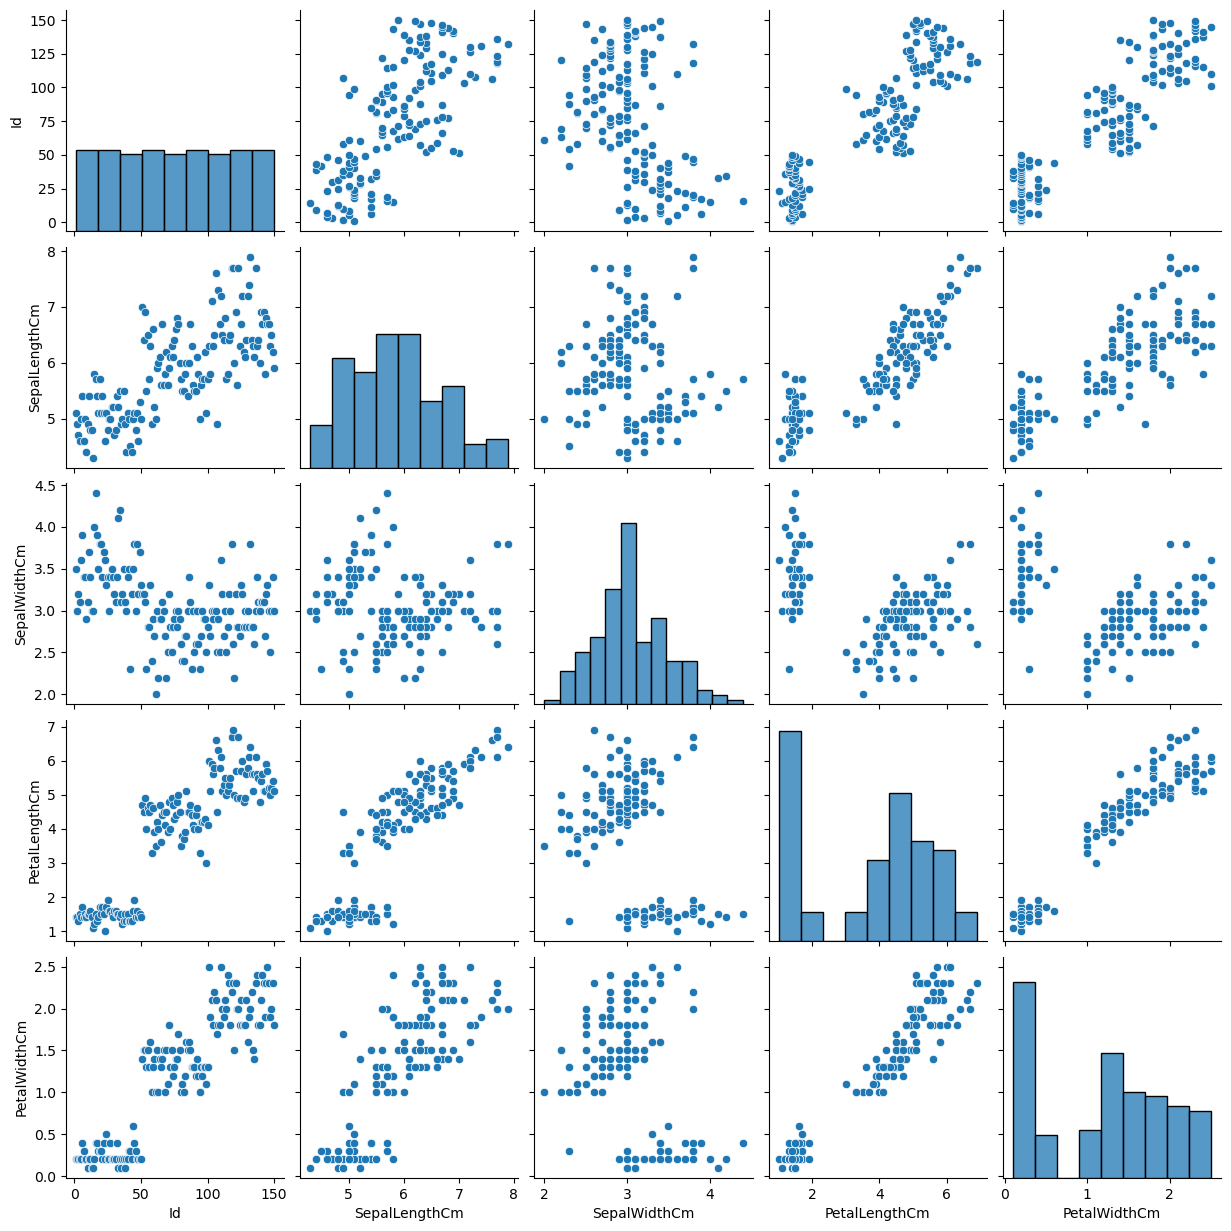

In [18]:
sns.pairplot(df)

In [19]:
corr = df.corr()

In [20]:
corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


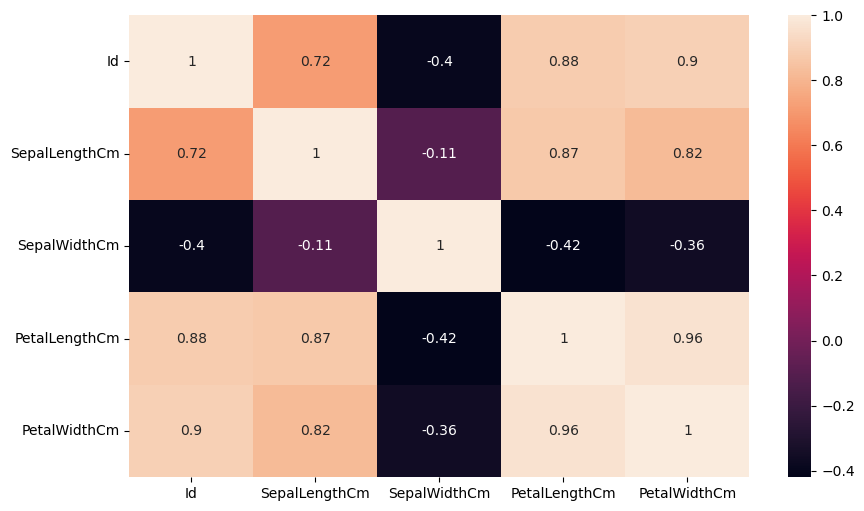

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

In [22]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [23]:
#encoding categorical df
label_encoder = preprocessing.LabelEncoder()

df['Species'] = label_encoder.fit_transform(df['Species'])

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [24]:
df["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [25]:
df = df.drop('Id', axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
# Input and Output variables
X = df.drop('Species', axis = 1)
y = df[['Species']]

In [28]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

In [29]:
print('x_train_shape :',x_train.shape ,'\n y_train_shape :',y_train.shape)

x_train_shape : (100, 4) 
 y_train_shape : (100, 1)


## Building model by entropy Criterion

In [30]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

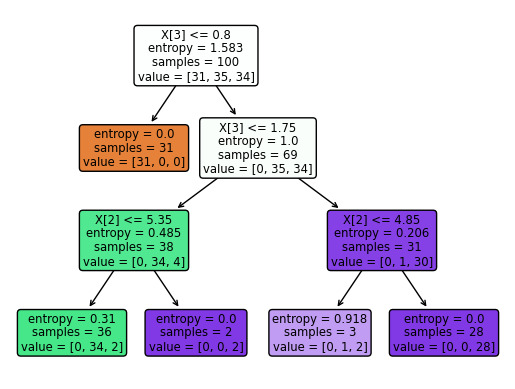

In [31]:
# Plotting Decision tree
tree.plot_tree(model_entropy,filled=True, rounded=True)
plt.show()

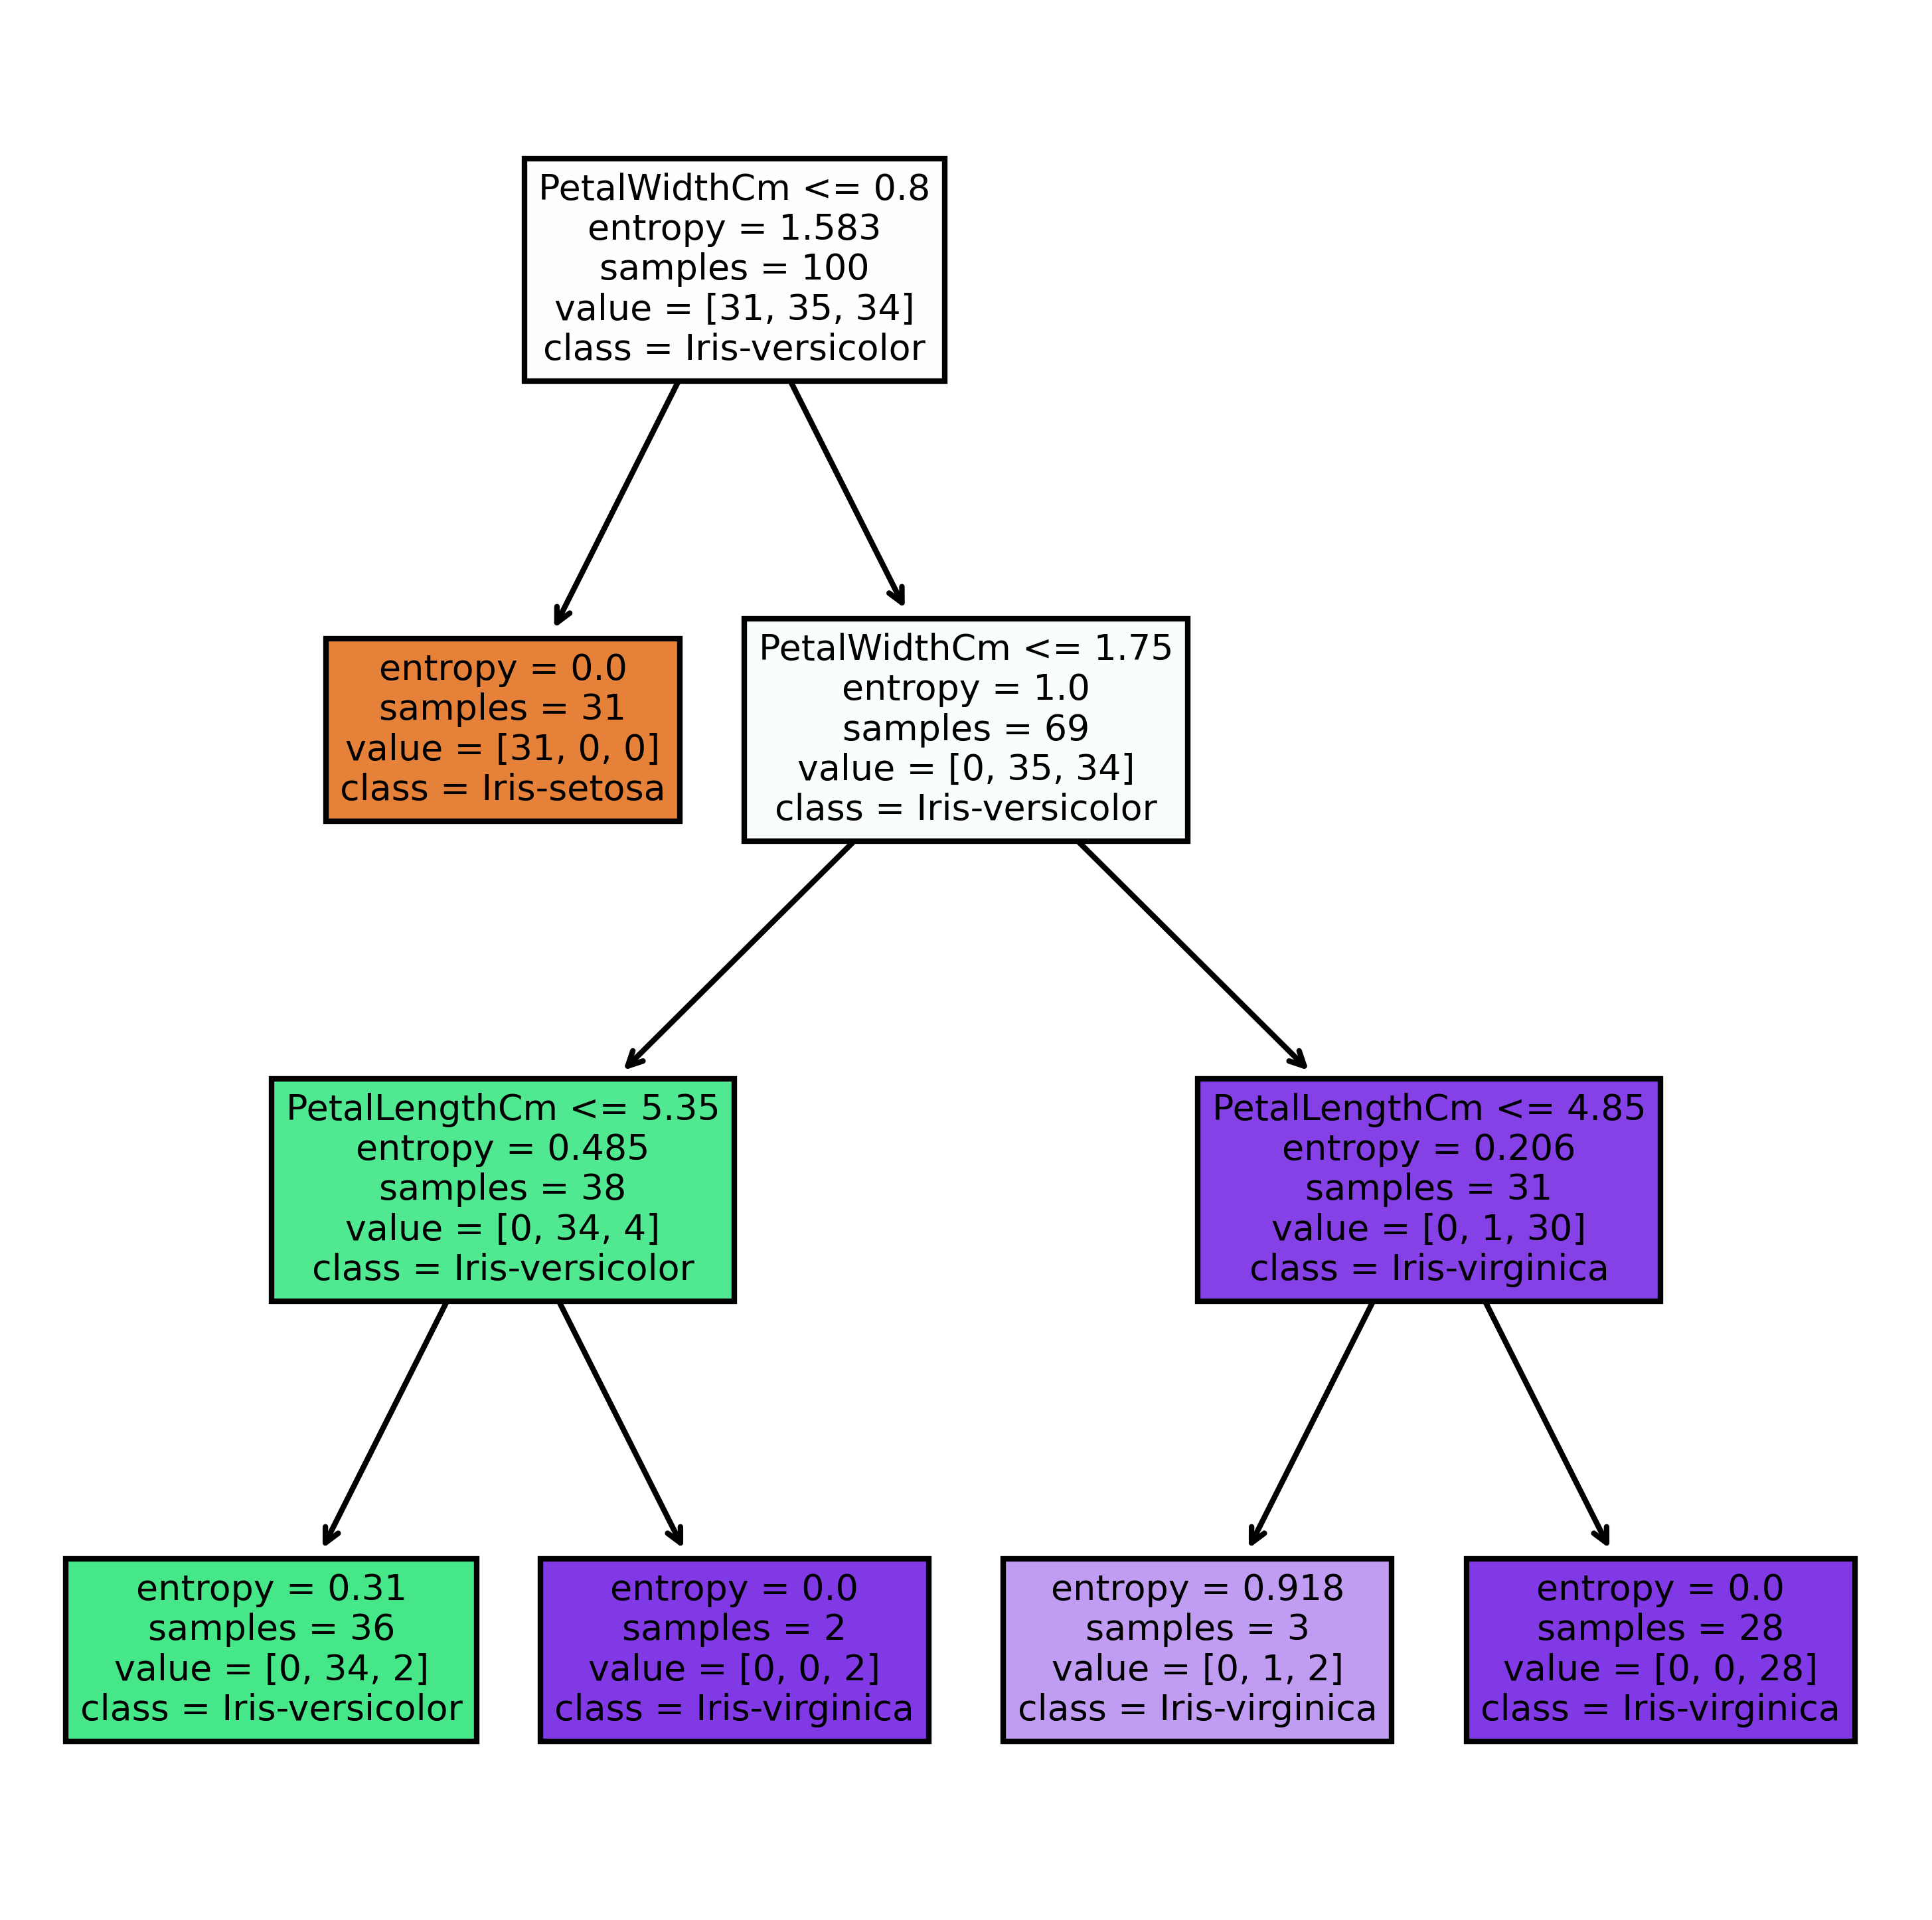

In [33]:
fn = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_entropy,feature_names = fn, class_names=cn,filled = True)
plt.show()

In [34]:
#prediction train data
pred_train_y = model_entropy.predict(x_train)

In [35]:
# Predicting df test data
pred_y_test = model_entropy.predict(x_test)
pred_y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [36]:
pd.Series(pred_y_test).value_counts()

0    19
1    16
2    15
dtype: int64

In [37]:
# Checking accuracy of model
accuracy_score(y_test,pred_y_test)

0.98

In [38]:
confusion_matrix(y_test,pred_y_test)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

In [39]:
accuracy_score(y_train,pred_train_y)     #we take max depth=3 , so for train data accuracy is less
                                         # if we do not chose max depth then accuracy score will be 1 for train data


0.97

In [40]:
confusion_matrix(y_train,pred_train_y)

array([[31,  0,  0],
       [ 0, 34,  1],
       [ 0,  2, 32]], dtype=int64)

## Building model by Gini Criterion

In [41]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

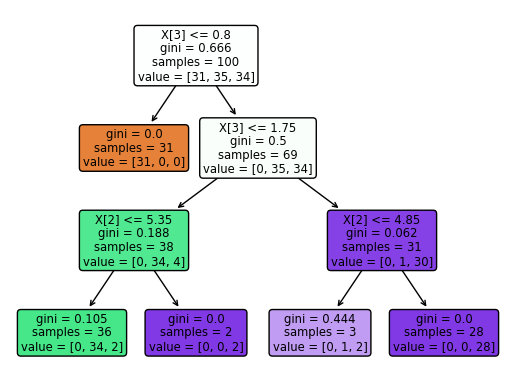

In [42]:
# Plotting Decision tree
tree.plot_tree(model_gini,filled=True, rounded=True)
plt.show()

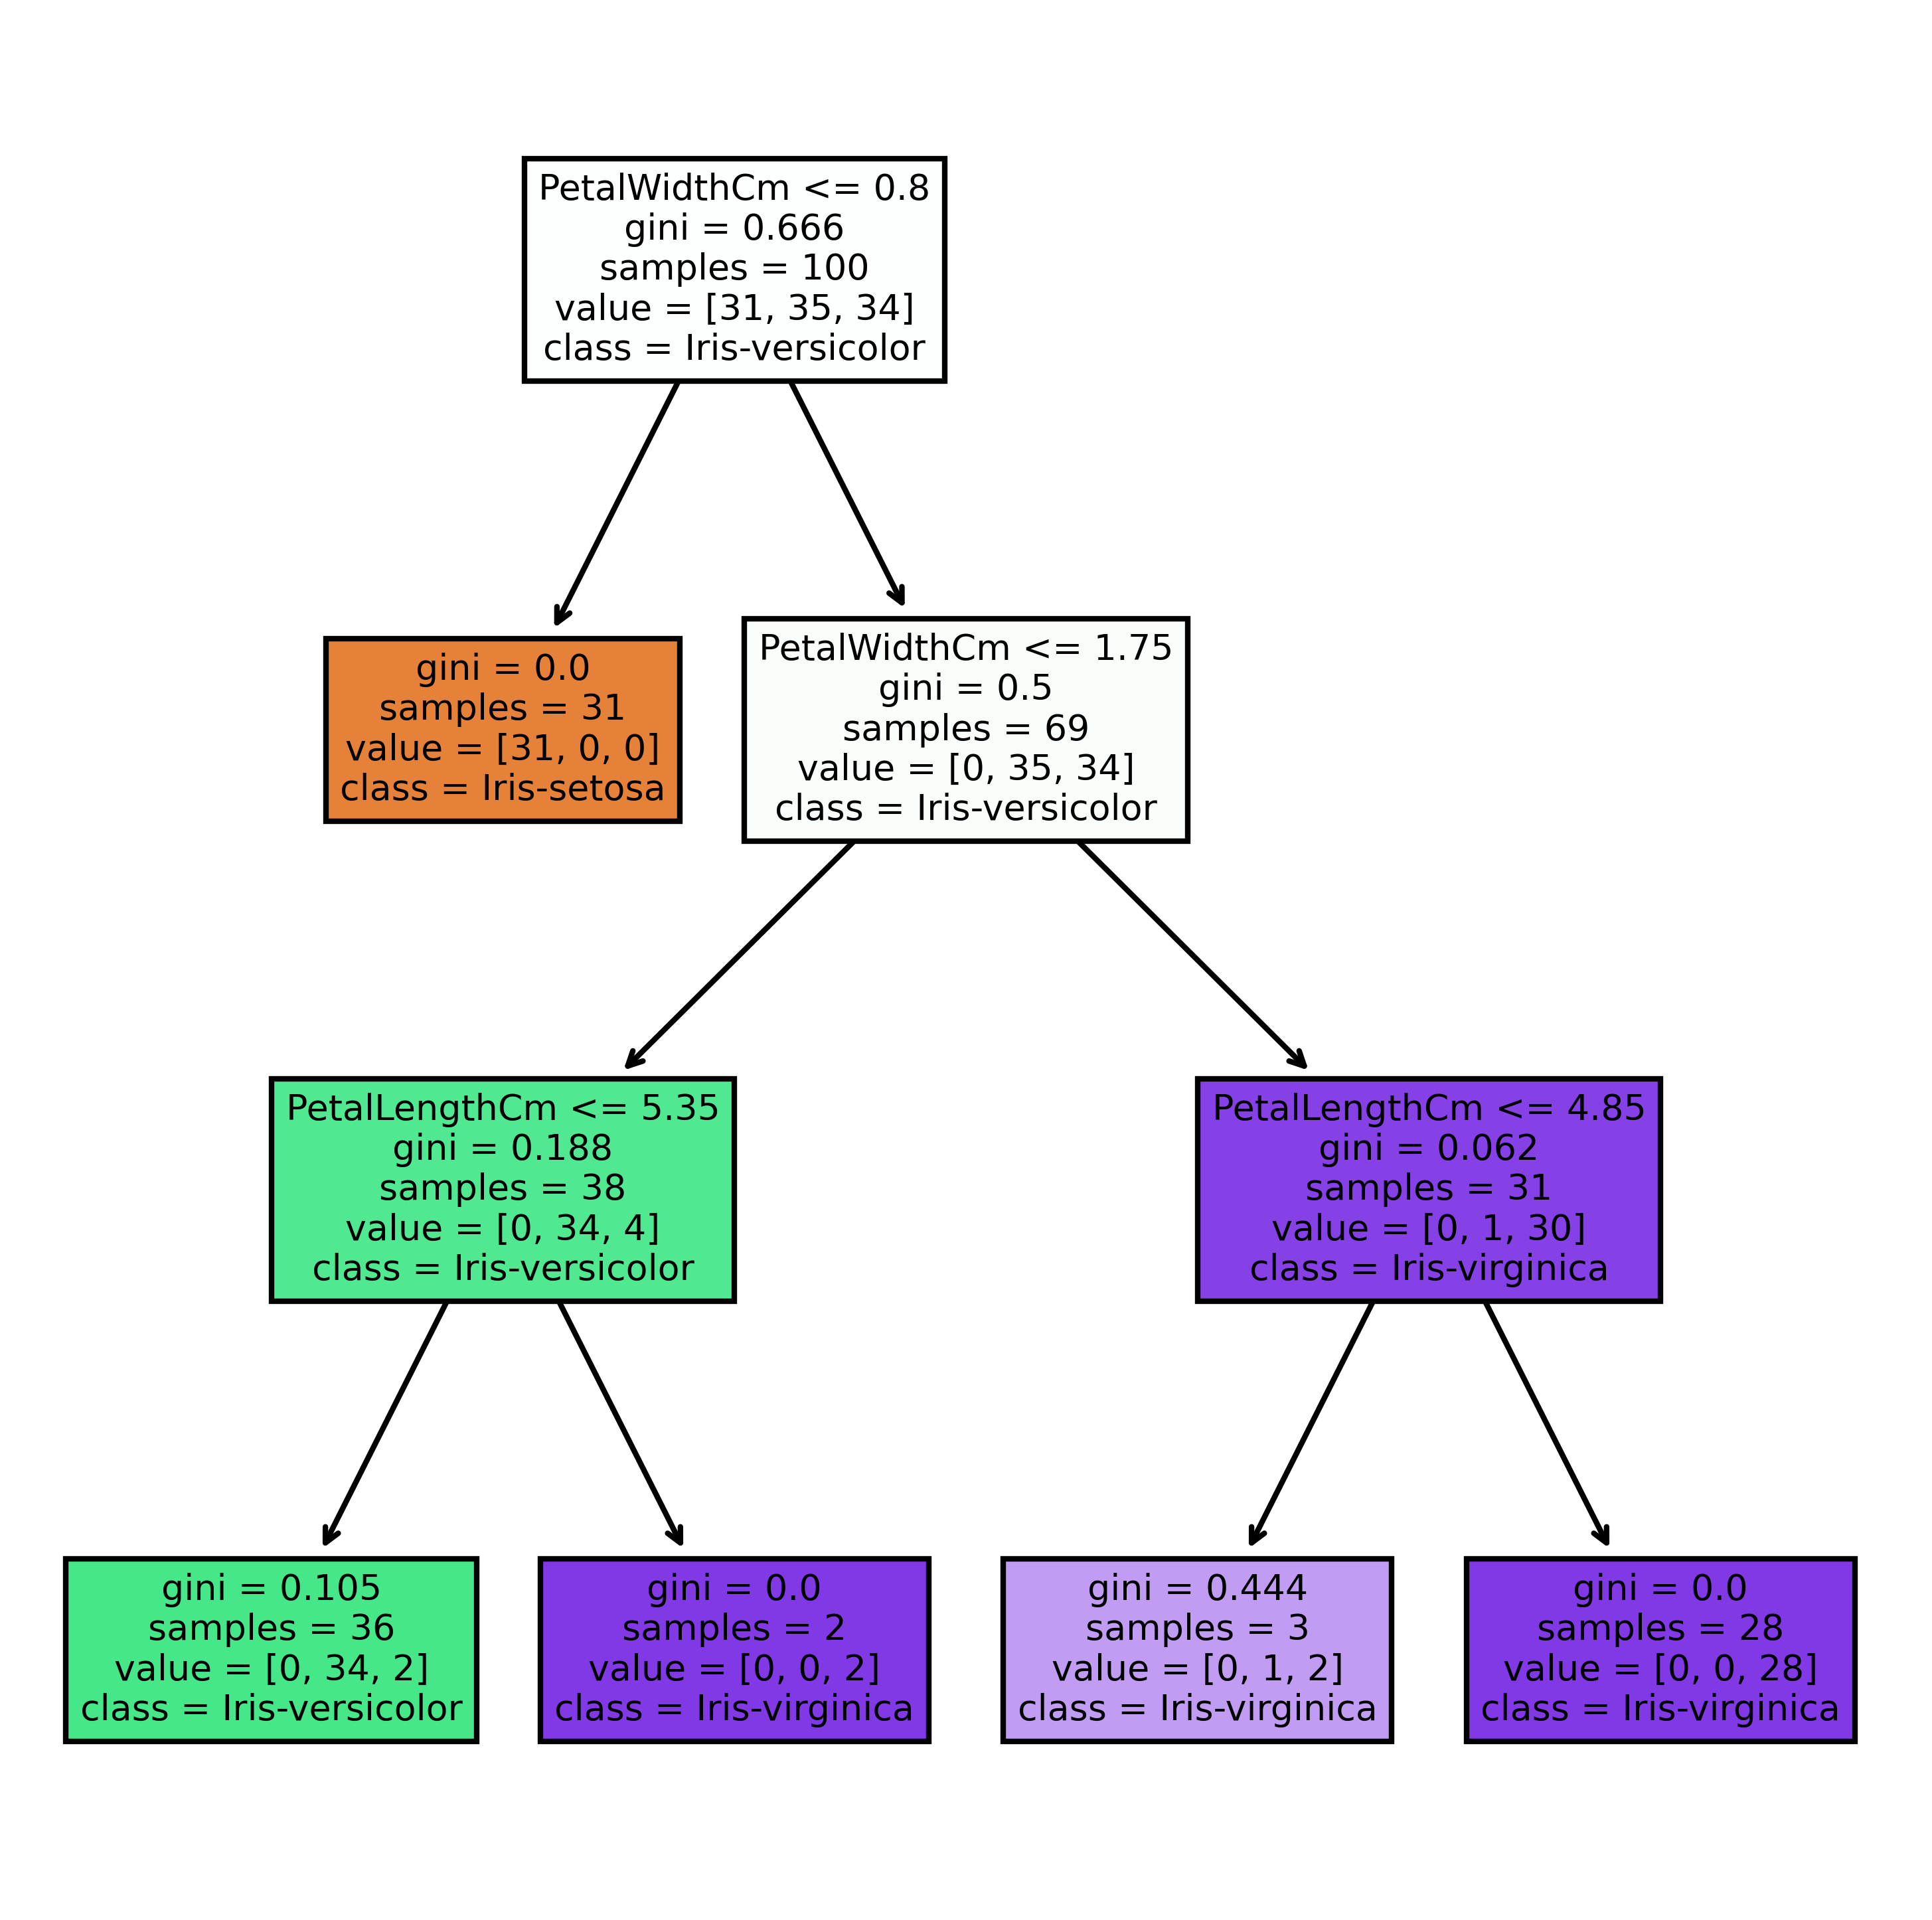

In [43]:
fn = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_gini,feature_names = fn, class_names=cn,filled = True)
plt.show()

In [44]:
#prediction train data
pred_train_y_gini = model_gini.predict(x_train)

In [45]:
# Predicting df by gini 
pred_test_y_gini = model_gini.predict(x_test)
pred_test_y_gini

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [46]:
pd.Series(pred_test_y_gini).value_counts()

0    19
1    16
2    15
dtype: int64

In [47]:
# Checking accuracy of model
accuracy_score(y_test,pred_test_y_gini)

0.98

In [48]:
confusion_matrix(y_test,pred_test_y_gini)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

In [49]:
accuracy_score(y_train,pred_train_y_gini)    #we take max depth=3 , so for train data accuracy is less
                                             # if we do not chose max depth then accuracy score will be 1 for train data

0.97

In [50]:
confusion_matrix(y_train,pred_train_y_gini)

array([[31,  0,  0],
       [ 0, 34,  1],
       [ 0,  2, 32]], dtype=int64)

## Decision Tree Classifier Results

### Entropy Criterion

- Test Accuracy: 0.98
- Train Accuracy: 0.97

### Gini Criterion

- Test Accuracy: 0.98
- Train Accuracy: 0.97

These results indicate that both the Entropy and Gini criteria produced similar accuracy scores for your decision tree classifier. The model achieved a high accuracy of 0.98 on the test data, suggesting that it performs well in classifying data it hasn't seen before. The slightly lower train accuracy of 0.97 suggests that the model generalizes well without overfitting to the training data.

Overall, these results demonstrate that your decision tree classifier is effective in classifying the data using both Entropy and Gini criteria.
